## <font color='purple'>K-NN technique for regression to predict the age of an abalone. </font> <br>
Supervised Machine Learning Lab<br>
Lab Assignment 05: K-Nearest Neighbor
### <font color='blue'>Kaustubh Raykar
PRN : 21070126048 <br> 
<break> AIML A3 </font>
 


Abalone Data Set

### <font color='teal'>Importing Libraries </font>

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

### <font color='teal'>Upload Dataset </font>

In [102]:
df = pd.read_excel('/content/abalone.xlsx')
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### <font color='teal'> Renaming columns </font>

In [103]:
# Rename columns
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Display first 5 rows of DataFrame with new column names
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### <font color='teal'>Data Description </font>

In [104]:
df.shape 

(4177, 9)

### <font color='teal'> Encoding column </font>

In [105]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [106]:
df.head(6)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### <font color='teal'> Data Cleaning </font>

In [107]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [108]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### <font color='teal'> Splitting into Feature matrix </font>

In [109]:
# Split data into feature matrix X and target variable y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [110]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [111]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

### <font color='teal'>Splitting the data into train test </font>

In [112]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [113]:
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of train: (2923, 9)
Shape of test: (1254, 9)
Shape of x_train: (3341, 8)
Shape of y_train: (3341,)
Shape of x_test: (836, 8)
Shape of y_test: (836,)


### <font color='teal'>Data Visualisation , EDA </font> 

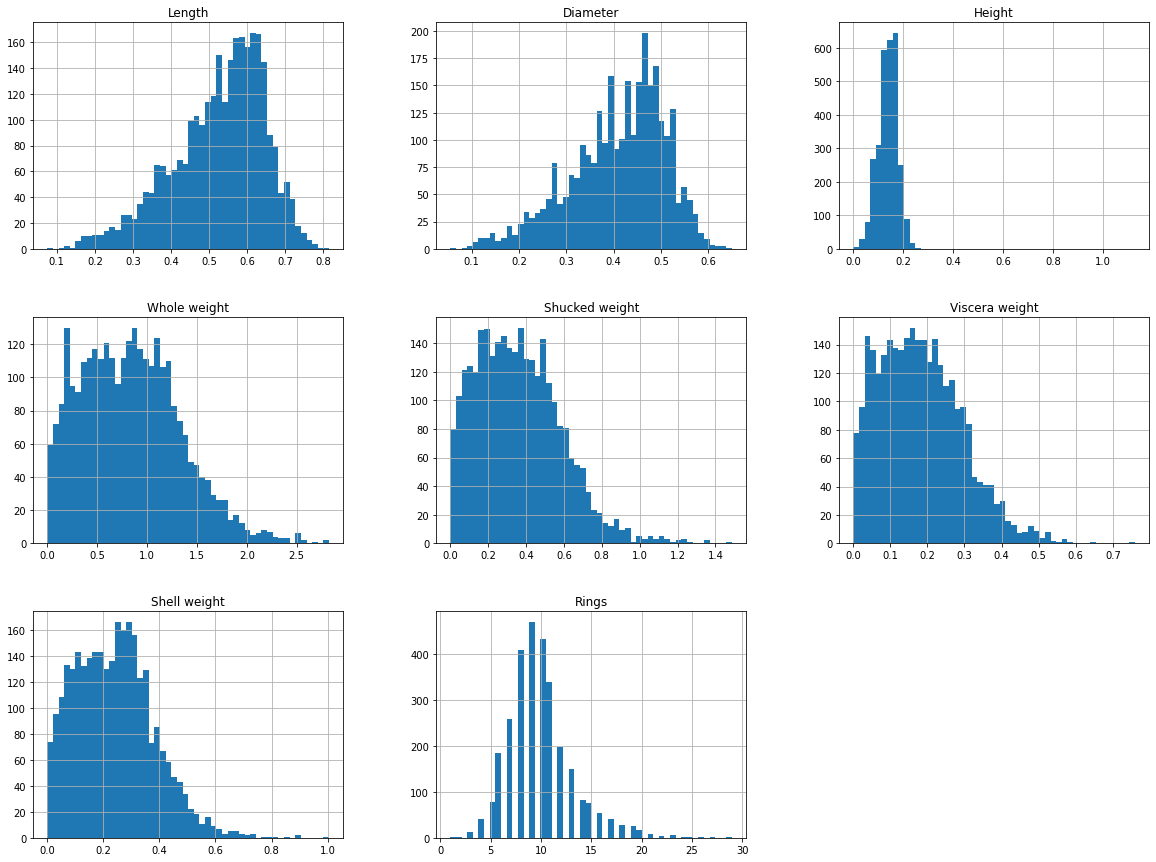

In [114]:
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20,15))
plt.show()


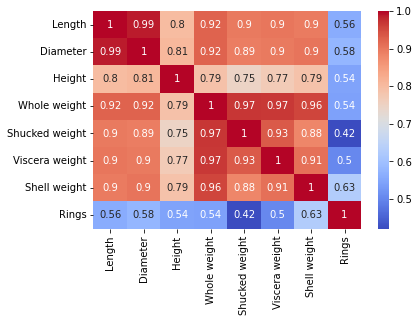

In [115]:
import seaborn as sns

corr = train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


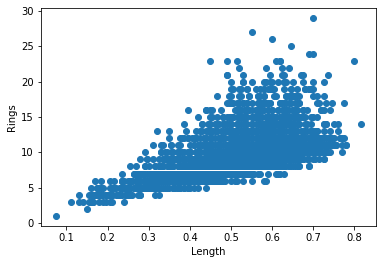

In [116]:
import matplotlib.pyplot as plt

plt.scatter(train['Length'], train['Rings'])
plt.xlabel('Length')
plt.ylabel('Rings')
plt.show()


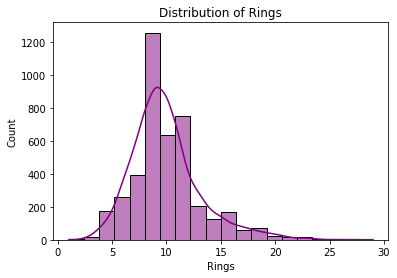

In [117]:
import seaborn as sns

sns.histplot(data=df, x='Rings', bins=20, kde=True, color='purple')
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()


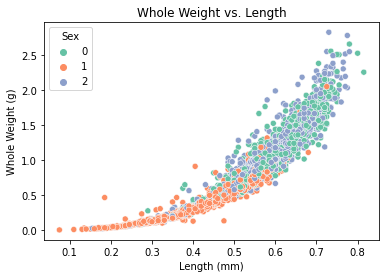

In [118]:
sns.scatterplot(data=df, x='Length', y='Whole weight', hue='Sex', palette='Set2')
plt.title('Whole Weight vs. Length')
plt.xlabel('Length (mm)')
plt.ylabel('Whole Weight (g)')
plt.show()


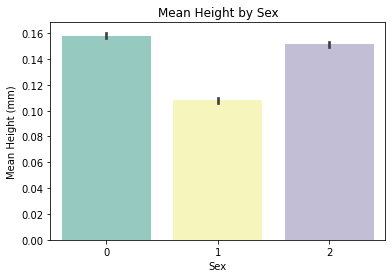

In [119]:
sns.barplot(data=df, x='Sex', y='Height', estimator=np.mean, palette='Set3')
plt.title('Mean Height by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Height (mm)')
plt.show()


### <font color='teal'> Applying scaling  </font>

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler (feature_range=(0, 1))

x_train_scaled= scaler.fit_transform(x_train)
x_train= pd.DataFrame(x_train_scaled)

x_test_scaled=scaler.fit_transform(x_test)
x_test= pd.DataFrame(x_test_scaled)

### <font color='teal'> Import and apply KNN model   </font>

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] #to store rmse values for diff k
k_list= []
for k in range(50):
    k = k+1
    model= KNeighborsRegressor(n_neighbors= k)
    
    model.fit(x_train, y_train) #fit the model
    pred= model.predict(x_test) #make prediction on test set
    error= sqrt(mean_squared_error(y_test,pred)) #calc rmse
    rmse_val.append(error) #store rmse values
    k_list.append(k)

In [122]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] #to store rmse values for diff k
k_list= []
for k in range(50):
    k = k+1
    model= KNeighborsRegressor(n_neighbors= k)
    
    model.fit(x_train, y_train) #fit the model
    pred= model.predict(x_test) #make prediction on test set
    error= sqrt(mean_squared_error(y_test,pred)) #calc rmse
    rmse_val.append(error) #store rmse values
    k_list.append(k)


### <font color='teal'> Calculating Optimum k value with least RMSE </font>

In [123]:
best_rmse=min(rmse_val)
best_k=k_list[rmse_val.index(best_rmse)]
print('Optimum K val= ',best_k, ' with least RMSE= ',best_rmse)

Optimum K val=  50  with least RMSE=  2.5503811517376684


### <font color='teal'> Plotting values </font>

<Axes: >

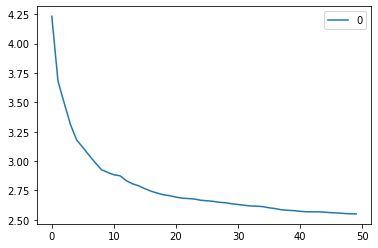

In [124]:
curve = pd.DataFrame(rmse_val)
curve.plot()